<a href="https://colab.research.google.com/github/Zewtta/PEL219_2025_RedesNeuraisArtificiais/blob/main/PEL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarefa 3
##Aluno: Matheus Vieira Martins
##Mestrado Eng. Mecânica

#### Anotações de aulas:
* Use o Keras para classificar números da base de dados MNIST
* O dataset já existe no TensorFlow
* A camada Flatten
* Use a camada Dense do Keras
* Explore diversos tipos de arquiteturas, camadas, neurônios:

  - O número de neurônios em cada camada
  - Adicionar mais camadas.
  - Mudar a função de ativação.
  - Mudar a função de erro.
  - Mudar o algoritmo de descida de gradiente para outros mais modernos...

* NORMALIZAR OS DADOS (Diversos tipos de métodos de normalização):
  - Standardization
  - Decimal scaling
  - Z-score
  - Median and MAD
  - Double sigmoid function
  - tanh-estimators

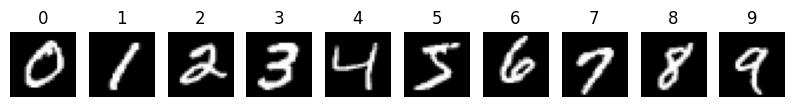

In [15]:
#Verificar as imagens da base só para entender

from keras.datasets import mnist
import matplotlib.pyplot as plt

# Carrega as variáveis de x e y treino e teste com o dataset do mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Gera figura
plt.figure(figsize=(10, 10))

# Adiciona 10 mini imagens dentro da figura gerada com um exemplo do numero usando a base de testes
for i in range(10):
    idx = (y_train == i).nonzero()[0][0]
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(i))
    plt.axis('off')
plt.show()

### Teste 01:
* sigmoide
* 1569 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [16]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1569, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.89

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - categorical_accuracy: 0.5464 - loss: 1.6451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8484 - loss: 0.6349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8749 - loss: 0.4775
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8837 - loss: 0.4222
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - categorical_accuracy: 0.8914 - loss: 0.3894
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8810 - loss: 0.4147


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1569)           │     1,231,665 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        15,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,247,367 (4.76 MB)

 Trainable params: 1,247,365 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.8991000056266785


### Teste 02:
* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [17]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.90
# Accuracy de 1569 é aproximadamente a mesma que 128 portanto é desncessário tantos neurônios

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.5636 - loss: 1.8268
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8420 - loss: 0.7725
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8703 - loss: 0.5457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8831 - loss: 0.4547
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8894 - loss: 0.4115
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8832 - loss: 0.4221


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9004999995231628


### Teste 03:
* sigmoide
* 10 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [18]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.86
# Accuracy de 10 é 4% menor que com 128 porém com 93% menos parâmetros (apenas 31.11 KB vs 397.55 KB de parâmetros com 128)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.3579 - loss: 2.1027
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.6867 - loss: 1.3874
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.7717 - loss: 1.0142
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8216 - loss: 0.8207
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8470 - loss: 0.6891
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8446 - loss: 0.6677


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,962 (31.11 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.8646000027656555


### Teste 04:
* sigmoide
* 1 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [19]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.22
# Accuracy de 1 é terrível, faz sentido reduzir os neurônios para obter eficiência até certo ponto

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.1071 - loss: 2.2883
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.1922 - loss: 2.2036
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.2073 - loss: 2.1189
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.2115 - loss: 2.0540
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.2173 - loss: 2.0040
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.2204 - loss: 1.9885


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807 (3.16 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.2206999957561493


### Teste 05:
Aumentando as épocas para verificar se melhora a acurácia
* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 20 épocas (4x)

In [20]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 20 épocas
model.fit(x_train, y_train, epochs=20, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.92
# Aumentar as épocas em 4x melhorou 2% do resultado (Comparando com 5 épocas)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.5430 - loss: 1.8400
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8361 - loss: 0.7869
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8685 - loss: 0.5538
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8819 - loss: 0.4632
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8887 - loss: 0.4161
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8947 - loss: 0.3859
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9005 - loss: 0.3605
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9037 - loss: 0.3438
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9038 - loss: 0.3401
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9074 - loss: 0.3263

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9259999990463257


### Teste 06:
Aumentando as épocas para verificar se melhora a acurácia
* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 50 épocas (10x)

In [21]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 20 épocas
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.94
# Aumentar as épocas em 10x melhorou 4% do resultado (Comparando com 5 épocas)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5411 - loss: 1.8399
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8399 - loss: 0.7753
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8681 - loss: 0.5471
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8817 - loss: 0.4596
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8884 - loss: 0.4165
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8940 - loss: 0.3862
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8979 - loss: 0.3664
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9031 - loss: 0.3494
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9052 - loss: 0.3417
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.9081 - loss: 0.3245

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9469000101089478
